In [2]:
! pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 57kB/s 


In [3]:
! pip install keras

In [4]:
! pip install pandas

In [5]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
#from keras.applications.inception_v3 import InceptionV3
#from keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.datasets import mnist

In [7]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os
import cv2

In [8]:
import pandas as pd
import numpy as np

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [11]:
random_state = 100
X_train, y_train = shuffle(X_train, y_train, random_state = random_state)
X_test, y_test = shuffle(X_test, y_test, random_state = random_state)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train[0].shape

(28, 28)

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26,
        154, 183,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110,
        216,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 216,
        185,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91, 254,
        151,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 141, 229,
         34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

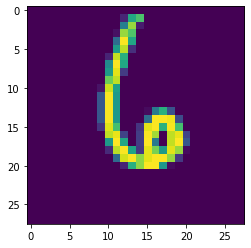

In [28]:
plt.imshow(X_train[0])

In [18]:
y_train

array([6, 8, 0, ..., 6, 2, 5], dtype=uint8)

In [19]:
X_train=X_train/255
X_test=X_test/255

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10196078, 0.60392157, 0.71764706,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.43137255, 0.84705882, 0.0745098 ,
        0.        , 0.    

In [22]:
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [23]:
y_train.shape

(60000, 10)

In [26]:
y_test.shape

(10000, 10)

In [29]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [44]:
model = Sequential([Flatten(input_shape=(28,28)),
                     Dense(100,activation='relu'),
                    Dense(50,activation='relu'),
                    Dense(10, activation='softmax')])
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2598 - accuracy: 0.9240 - val_loss: 0.1292 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1112 - accuracy: 0.9662 - 

In [45]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.9752


[0.10333315283060074, 0.9751999974250793]

In [46]:
y_pred=model.predict(X_test)
y_pred_labels= np.argmax(y_pred, axis=1)
y_pred_labels

y_pred_counts = np.unique(y_pred_digits, return_counts=True)
y_pred_counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 983, 1131, 1033, 1007,  995,  921,  947, 1056,  937,  990]))

In [47]:
y_real_labels= np.argmax(y_test, axis=1)
y_real_labels

y_real_counts = np.unique(y_real_labels, return_counts=True)
y_real_counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [48]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_pred_labels,y_real_labels)
c_m

array([[ 970,    0,    6,    2,    0,    3,    1,    0,    4,    2],
       [   0, 1131,    7,    0,    0,    1,    2,    3,    3,    6],
       [   0,    0,  991,    7,    2,    1,    2,    6,    1,    1],
       [   2,    1,    2,  978,    0,   13,    0,    1,    3,    1],
       [   0,    0,    2,    0,  967,    1,    1,    0,    2,   25],
       [   0,    1,    0,    3,    0,  848,    2,    0,    2,    2],
       [   3,    2,    4,    1,    7,   11,  949,    0,    2,    1],
       [   3,    0,   14,   10,    3,    1,    0, 1014,    4,   11],
       [   1,    0,    6,    5,    1,    8,    1,    2,  950,    6],
       [   1,    0,    0,    4,    2,    5,    0,    2,    3,  954]])

Text(33.0, 0.5, 'Actual')

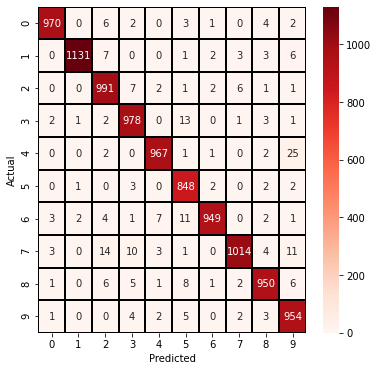

In [49]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [50]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
acc_score = accuracy_score(y_real_labels, y_pred_labels)
acc_score

0.9752

In [51]:
y_pred=model.predict(X_test)
y_pred[0]
y_pred_0=np.argmax(y_pred[0])
y_pred_0

6

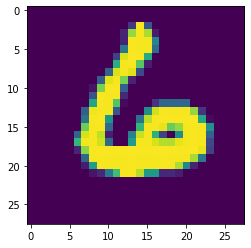

In [52]:
plt.imshow(X_test[0])